# Gépi tanulás

---

(2020. 02. 11. – 15. óra)

Mittelholcz Iván

## 1. Mi a gépi tanulás?

![nng](https://raw.githubusercontent.com/mittelholcz/notes/3b953874c5604b8dadfee5522a7e85a80aa942ad/materia_ml/img/hanagyleszek.png)

Forrás: <https://www.nng.com/hanagyleszek>

### 1.1. Fajtái

- kimenet szerint:
    - osztályozás: diszkrét kategóriák sorolás vagy címkézés (pl. spam vagy nem spam, setosa, versicolor vagy virginica, stb.)
    - regresszió: folytonos kimenet (pl hány fok lesz)
- bemenet szerint:
    - felügyelt: tanulás során látja a megfejtést
    - felügyelet nélküli: nincs plusz adat

### 1.2. Felügyelt osztályozás

1. Az adatok előkészítése:
    - Szerzünk / csinálunk egy nagy kupac adatot (*feature matrix*), amit felcímkézünk (*target vector*). Ez lesz a gold standard.
    - Felbontjuk az adatot egy nagyobb részre, amin tanítjuk a rendszert (tanítóadat), és egy kisebbre, amin tesztelünk / kiértékelünk. Vagy használhatunk [*cross validation*](https://en.wikipedia.org/wiki/Cross-validation_(statistics))-t is.
1. Kiválasztunk egyet a sok lehetséges módszer (döntési fa, SVM, Naive Bayes, neurális hálók, stb.) közül. 
1. Paraméterezzük a módszerünket.
1. Tanítunk a tanítóadaton, azaz megmutatjuk a gépnek a tulajdonságokat is és a címkéket is (model).
1. Kiértékelünk, azaz a tesztadatnak megmutatjuk a tulajdonságokat a teszadatból, és megkérjük, hogy tippelje meg a címkéket.
    - Ha nem vagyunk elégedettek, vagy az adaton, vagy a módszeren kell javítani és újratanítani.
1. Ha elégedettek vagyunk, használjuk a modelt.

## 2. Scikit-learn

Várt adatok:

* feature-mátrix:
    * egy sor = egy példány
    * egy oszlop = egy feature
    * általában *X*-el jelölik
    * Numpy *array* vagy pandas *DataFrame* típusúban kell megadni
* target-vektor:
    * egy sor = egy példány, minden eleme megfelel a *feature-mátrix* egy sorának
    * általában *y*-nal jelölik
    * Numpy *array* vagy pandas *Series* tipusú lehet
    * csak a felügyelt tanuláshoz kell

Lépések:

1. adatok előkészítése (X, y, train, test)
2. módszer választása: `form sklearn.xyz_modul import választott_módszer`
3. modell létrehozása: `model = valasztott_modszer(paraméterek...)`
4. tanítás: `model.fit(X, y)`
6. kiértékelés: ehhez az `sklearn.metrics`-ben vannak hasznos dolgok 
5. modell használata: `model.predict(new_X)`

Gépi tanulós *hello world*: iriszek három osztályba sorolása levélméreteik alapján.

**jegyek**: *sepal_length*, *sepal_width*, *petal_length*, *petal_width*

**címkék**: *setosa*, *versicolor*, *virginica*

### 2.1. adatok előkészítése

In [15]:
# adatok beolvasása
import pandas as pd

path = ! [ -d 'iris.tsv' ] && echo 'iris.tsv' || echo '../13.pandas/iris.tsv'
df = pd.read_csv(path[0], sep='\t', index_col=0)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
ID,,,,,
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [13]:
# feature-mátrix
X = df.drop('species', axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
ID,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [14]:
# target-vektor
y = df['species']
y.head()

ID
1    setosa
2    setosa
3    setosa
4    setosa
5    setosa
Name: species, dtype: object

In [18]:
# adatok vágása tanításhoz és teszteléshez
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
print(len(X_train), len(y_train), len(X_test), len(y_test))
# X_train

112 112 38 38


### 2.2. módszer választása

Naiv Bayes módszerek:

* egyszerűek, nem nagyon kell paraméterezni
* gyorsak
* feltevés, hogy a jegyek függetlenek egymástól

In [19]:
from sklearn.naive_bayes import GaussianNB

### 2.3. modell létrehozása

In [20]:
model = GaussianNB() # itt lehetnek további megadandó paraméterek az iniciálizáláshoz, de most nincsenek

### 2.4. tanítás

In [21]:
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### 2.5. kiértékelés

In [27]:
from sklearn.metrics import accuracy_score, classification_report

print('accurcy: ', accuracy_score(y_test, y_predicted))
print('\nREPORT:')
print(classification_report(y_test, y_predicted))

accurcy:  0.9473684210526315

REPORT:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.88      0.88      0.88         8
   virginica       0.94      0.94      0.94        16

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



Text(91.68, 0.5, 'true value')

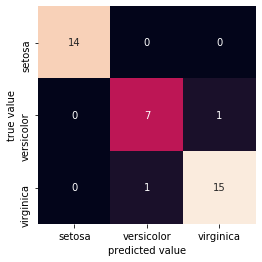

In [29]:
# confusion matrix
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_test, y_predicted)
sb.heatmap(confmat, square=True, annot=True, cbar=False, 
           xticklabels=['setosa', 'versicolor', 'virginica'], 
           yticklabels=['setosa', 'versicolor', 'virginica'])
plt.xlabel('predicted value')
plt.ylabel('true value')

### 2.6. jóslás

In [26]:
y_predicted = model.predict(X_test)
# y_predicted

### 2.7. Kitekintés

* [felügyelt módszerek](http://scikit-learn.org/stable/supervised_learning.html)
* [jegykinyerés szövegből](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction)
* [grid search](http://scikit-learn.org/stable/modules/grid_search.html#exhaustive-grid-search)
* [pipeline](http://scikit-learn.org/stable/modules/pipeline.html)